In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from evaluation import get_maintenance_cost
#import pyspark as spark

#read contents of csv into variables
datacenters = pd.read_csv("../data/datacenters.csv")
demand = pd.read_csv("../data/demand.csv")
selling_prices = pd.read_csv("../data/selling_prices.csv")
servers = pd.read_csv("../data/servers.csv")

# print(datacenters)
# print(demand)
# print(selling_prices)
# print(servers)

In [91]:
# calc total demand for cpu and gpu
total_cpu_demand = demand["CPU.S1"]+demand["CPU.S2"]+demand["CPU.S3"]+demand["CPU.S4"]
total_gpu_demand = demand["GPU.S1"]+demand["GPU.S2"]+demand["GPU.S3"]

if("total_cpu" not in demand.columns):
    demand.insert(len(demand.columns), "total_cpu", total_cpu_demand, True)
if("total_gpu" not in demand.columns):
    demand.insert(len(demand.columns), "total_gpu", total_gpu_demand, True)

print(demand.columns)

Index(['time_step', 'latency_sensitivity', 'CPU.S1', 'CPU.S2', 'CPU.S3',
       'CPU.S4', 'GPU.S1', 'GPU.S2', 'GPU.S3', 'total_cpu', 'total_gpu'],
      dtype='object')


# First look at demand changes

In [92]:
laten_sens_high = demand.loc[demand["latency_sensitivity"] == "high"]
laten_sens_med = demand.loc[demand["latency_sensitivity"] == "medium"]
laten_sens_low = demand.loc[demand["latency_sensitivity"] == "low"]

laten_sens_high_np = laten_sens_high.to_numpy()
laten_sens_med_np = laten_sens_med.to_numpy()
laten_sens_low_np = laten_sens_low.to_numpy()

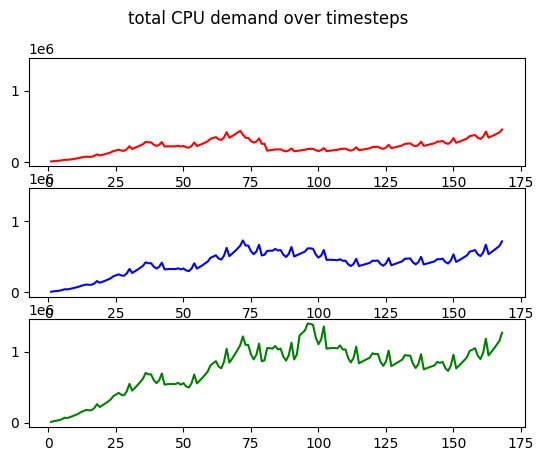

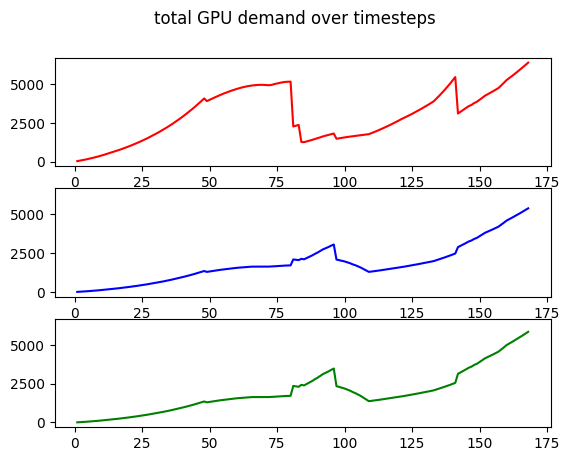

In [93]:
fig, axs = plt.subplots(3, sharey=True)
fig.suptitle("total CPU demand over timesteps")
axs[0].plot(laten_sens_high_np[:, 0], laten_sens_high_np[:, 9], color="r")
axs[1].plot(laten_sens_med_np[:, 0], laten_sens_med_np[:, 9], color="b")
axs[2].plot(laten_sens_low_np[:, 0], laten_sens_low_np[:, 9], color="g")

fig2, axs2 = plt.subplots(3, sharey=True)
fig2.suptitle("total GPU demand over timesteps")
axs2[0].plot(laten_sens_high_np[:, 0], laten_sens_high_np[:, 10], color="r")
axs2[1].plot(laten_sens_med_np[:, 0], laten_sens_med_np[:, 10], color="b")
axs2[2].plot(laten_sens_low_np[:, 0], laten_sens_low_np[:, 10], color="g")

In [94]:
# fig, axs = plt.subplots(3, sharey=True)
# fig.suptitle("cpuS1 demand over timesteps")
# axs[0].plot(laten_sens_high_np[:, 0], laten_sens_high_np[:, 2], color="r")
# axs[1].plot(laten_sens_med_np[:, 0], laten_sens_med_np[:, 2], color="b")
# axs[2].plot(laten_sens_low_np[:, 0], laten_sens_low_np[:, 2], color="g")

# print(laten_sens_high)
# print(laten_sens_med)
# print(laten_sens_low)


In [141]:
def calculate_server_cost(servers):
    datacenter_ids = pd.unique(datacenters["datacenter_id"])
    server_generations = pd.unique(servers["server_generation"])
    #lifespan_analysis = pd.DataFrame(columns=["datacenter_id, server_generation", "cost"])
    lifespan_analysis = {"DC1":{},"DC2":{},"DC3":{},"DC4":{}}
    for datacenter in datacenter_ids:
        for server in server_generations:
            lifespan_analysis[datacenter].update({server:[]})
    #print(lifespan_analysis)
    for datacenter in datacenter_ids:
        for server_generation in server_generations:
                lifespan_costs = np.zeros((168))
                print(lifespan_costs[1])
                row = servers[servers.server_generation == server_generation]
                #print(row)
                c = 0
                r = row['purchase_price']
                b = row['average_maintenance_fee']
                xhat = row['life_expectancy'] # 96
                e = row['energy_consumption']
                c += e * datacenters[datacenters.datacenter_id == datacenter]["cost_of_energy"]
                for lifespan in range(1,168):
                    x = lifespan
                    alpha_x = get_maintenance_cost(b, x, xhat)
                    print("lifespan: ", alpha_x)
                    lifespan_costs[lifespan] = alpha_x + c
                print(lifespan_costs)
                lifespan_analysis[datacenter][server_generation] = lifespan_costs
    return lifespan_analysis

In [142]:
c = calculate_server_cost(servers)

0.0
lifespan:  0    261.0
dtype: float64
lifespan:  0    243.0
dtype: float64
lifespan:  0    228.396994
dtype: float64
lifespan:  0    216.0
dtype: float64
lifespan:  0    205.243382
dtype: float64
lifespan:  0    195.793988
dtype: float64
lifespan:  0    187.43168
dtype: float64
lifespan:  0    180.0
dtype: float64
lifespan:  0    173.381963
dtype: float64
lifespan:  0    167.486764
dtype: float64
lifespan:  0    162.241865
dtype: float64
lifespan:  0    157.587975
dtype: float64
lifespan:  0    153.475724
dtype: float64
lifespan:  0    149.86336
dtype: float64
lifespan:  0    146.715115
dtype: float64
lifespan:  0    144.0
dtype: float64
lifespan:  0    141.690907
dtype: float64
lifespan:  0    139.763925
dtype: float64
lifespan:  0    138.197802
dtype: float64
lifespan:  0    136.973529
dtype: float64
lifespan:  0    136.073996
dtype: float64
lifespan:  0    135.48373
dtype: float64
lifespan:  0    135.188662
dtype: float64
lifespan:  0    135.17595
dtype: float64
lifespan:  0    1

/var/folders/cc/c3cqjy4s7zqfh4q58lfmvkq80000gn/T/ipykernel_15069/990632364.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  lifespan_costs[lifespan] = alpha_x + c


ValueError: setting an array element with a sequence.

In [83]:
print(c)

[     0.         513870.34375     20777.90625     20297.27466614
  19889.25        19535.21534464  19224.20558228  18948.97533036
  18704.375       18486.55424684  18292.52443929  18119.89805381
  17966.72366456  17831.37633043  17712.48191073  17608.86311463
  17519.5         17443.50038481  17380.07724369  17328.53114217
  17288.23637857  17258.62990408  17239.20235762  17229.49073396
  17229.07232913  17237.55969644  17254.59641086  17279.8534858
  17313.02632146  17353.83208956  17402.00747927  17457.30674392
  17519.5         17588.37173897  17663.71951961  17745.35281432
  17833.09198738  17926.76738677  18026.21853433  18131.29340111
  18241.84775715  18357.74458629  18478.85355815  18605.05055035
  18736.21721523  18872.24058601  19013.01271793  19158.43036059
  19308.39465825  19462.81087509  19621.58814287  19784.63922881
  19951.88032171  20123.23083448  20298.6132216   20477.95281012
  20661.17764291  20848.21833318  21039.00792911  21233.48178796
  21431.57745854  21633.23